# Example D: Nested Cross Validation and Model Selection

 Aim: This is a working example on Nested Cross Validation — evaluating a learner (Random Forest) is conducted as shown in the example:

Dataset: Iris dataset.

The general procedure in cross validation is as follows:

This is a nested cross validation of 10 outer folds, and 3 inner folds for each.Final model is generated through both loops — model skill becomes the mean of cross validation score. You also can print model parameters for best peforming Random Forest (provided in the example below).

In [ ]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space (parms for hyperparameters, sometimes you find it as param_grid or simply parameters)

params = dict()
params['n_estimators'] = [2, 4, 10]
params['max_features'] = [2, 4, 6]
# define the classfier as one whose hyperparameters are found/optimised via GridSearchCV. 
clf = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
# note that clf (the classifier) is fit is tuned earlier on the nested (cv_inner) and evaluated on the outer cv.
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv_outer)
print('Each Fold score (we have 10 here): %s' % scores)

# report performance - this is what you report as your model. 
print('Model Accuracy (mean. This is your estimation of model accuracy): %.3f (%.3f)' % (mean(scores), std(scores)))

# If you want to see the parameters which were found for the 'best performing' model, fit the (GridSearched) model and print its parameters as follows:
clf.fit(X,y)
# Best params
print('Model Best params: %s' % clf.best_params_)
# Best training data accuracy - uncomment below if you want.
#print('Model Best training accuracy: %.3f' % clf.best_score_)

Each Fold score (we have 10 here): [0.87 0.92 0.9  0.9  0.91 0.87 0.92 0.92 0.92 0.88]
Model Accuracy (mean. This is your estimation of model accuracy): 0.901 (0.020)
Model Best params: {'max_features': 4, 'n_estimators': 10}


# Tasks D

 Apply the above procedure on another classfier and tune and print best parameters of your choice (SVC, Logistic Regression, Knn, Decision Tree). Can you implement a battery of evaluations for a set of models instead of just one?

# Back to Back Modelling

 No Tasks — applying much of what you learnt thus far to tune models, and pick one (learn also, if you like, the use of pipelines). — source here

Note 1: PCA will be covered in coming weeks (don't worry if you haven't used it before).

Note 2: This will take long time to run — you can reduce the battery of models to two if you want faster results.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

 Performing model optimizations...

Estimator: Logistic Regression Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'} Best training accuracy: 0.917 Test set accuracy score for best params: 0.967

Estimator: Logistic Regression w/PCA Best params: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'} Best training accuracy: 0.858 Test set accuracy score for best params: 0.933

Estimator: Random Forest

## Classification technique on the Breast Cancer dataset

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_breast_cancer
from sklearn import tree,linear_model,neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.ens import RandomForestClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'sklearn.ens'

In [2]:
# Ignoring warnings for clean output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# load the data set
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
## Explore the data set
n_samples, n_features = bc.data.shape
print(bc.keys())
print ('The dimensions of the data set are ', n_samples, 'by', n_features)
print()
print(bc.data.shape)
print(bc.target.shape)
print()
print('The classes are: \n', bc.target_names)
print()
print('The features in the data set are:\n', bc.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
The dimensions of the data set are  569 by 30

(569, 30)
(569,)

The classes are: 
 ['malignant' 'benign']

The features in the data set are:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Decision Trees

### Modeling

 Initialized the classifier with hyper-parameter max_depth = 3 as the starting point as the Wisconsin Diagnostic Breast Cancer names file mentions that the best accuracy was received using 3 parameters - Worst Area, Worst Smoothness and Mean Texture

In [5]:
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=45)

In [6]:

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33,random_state=45)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: {0:.2%}".format(accuracy_score(y_test, y_pred)))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Accuracy: 94.15%

Confusion Matrix: - 
 [[ 60   8]
 [  3 117]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92        68
           1       0.94      0.97      0.96       120

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



In [16]:
# After being fitted, the model can then be used to predict the class of samples:
print('The 1st instance is predicted to belong to class:', clf.predict(bc.data[:1, :]))
# Here we predict the class of a single value

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(bc.data[:1, :]))
# Here you can see the probability of each one of the classes

The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[1. 0.]]


 Hyper-parameter max_depth = 3 gives us a Accuracy of 94.15%.

Accuracy can be deceiving as it doesn't take into account false negatives. Being a medical case, breast cancer classification should minimize false negatives as this can lead lead to a persons death.

I am selecting F1-score for selecting the best estimator because it is a better measure than accuracy as this score takes both false positives and false negatives into account.

We get a weighted f1 score of 94% using this model which is a good starting point. Lets see if this can be improved by tuning the hyper parameters.

### Tuning the hyper-parameters

 Now we see what is the best max-depth for maximizing accuracy in the test data.

The max-depth of a tree defines the number of features used to classify the data. Using very few features would result in underfitting and using a lot of features would lead to over-fitting.

We also look at both criterions gini and entropy to see which gives us a better accuracy

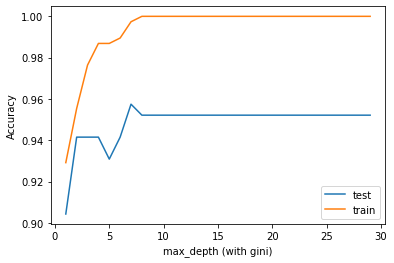

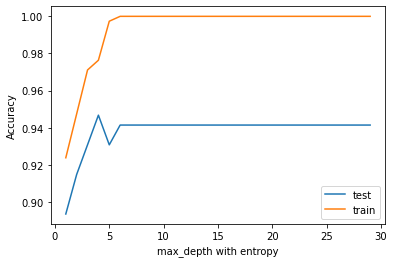

In [19]:
from matplotlib import pyplot as plt
# Optimize decision tree and detect (potential) over-fitting
complexity_values = range(1,30)

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33, random_state=45)

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value, random_state=45)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth (with gini)")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value, random_state=45)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth with entropy")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

 plot a graph of train and test accuracy w.r.t max_depth and we can see that accuracy for the test data is maximum and close to the training data at max_depth = 8 & criterion = "gini"

Underfitting : If we use max_depth = 1, this would be under-fitting as we are using only one parameter to classify the the data. As seen in the above graph, our test and train accuracies are pretty low when max_depth is lower (1/2)

Overfitting : If our max_depth is large i.e greater than 6, we see 100% accuracy in the training data but the accuracy for test data is fluctuating. This is a case of over-fitting so we definitely want the max deph to be less than 6, and max_depth = 4 satisfies this condition.

### Tuning parameters - Nested CV & Grid search

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree,linear_model,neighbors, datasets

To search for the best parameters, we run a nested cross validation with grid search with the following hyper parameters

penalty : To check whether l1 or l2 penalty gives us a better result.

C : We also check what is an optimal value for regularization strength. The hyper-parameter 'C' is 1 / lambda (which is an inverse of the penalty or regularization strength.

In [21]:
X_train,X_test,y_train,y_test = train_test_split(bc.data, bc.target,test_size=0.33,random_state=45)

param_grid = dict(criterion = ["gini", "entropy"], 
                  max_depth = range(2,10),
                  min_samples_leaf = range(2,8),
                  min_impurity_decrease = [0,1e-8,1e-7,1e-6,1e-5,1e-4]
                 )

grid_tree_clf = tree.DecisionTreeClassifier(random_state=45)

inner_cv = KFold(n_splits=4, shuffle=True, random_state=45)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=45)

grid_tree = GridSearchCV(grid_tree_clf, param_grid, cv = inner_cv, scoring='f1',n_jobs=-1)
grid_tree.fit(X_train,y_train)

# Nested CV with parameter optimization

GridSearchCV(cv=KFold(n_splits=4, random_state=45, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_impurity_decrease': [0, 1e-08, 1e-07, 1e-06,
                                                   1e-05, 0.0001],
                         'min_samples_leaf': range(2, 8)},
             scoring='f1')

In [23]:
print("Using Nested CV with grid search, we acheive accuracy: {0:.2%} +/- {1:.2%}".format(nested_score.mean(), nested_score.std()))
print()
print ("The best hyper-parameters to get these accuracy are :-\n", grid_tree.best_params_)
print()
print ("The best decision tree classifier is :-\n", grid_tree.best_estimator_)
y_pred = grid_tree.best_estimator_.predict(X_test)
#plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,title='Confusion matrix')
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

NameError: name 'nested_score' is not defined

#### K-Nearest Neighbours

We start by looking at the test data and training data accuracies for number of neighbours from 1 to 30. We have scaled the data to normalise it for better classification results by avoiding missclasification due to the magnitude of the features

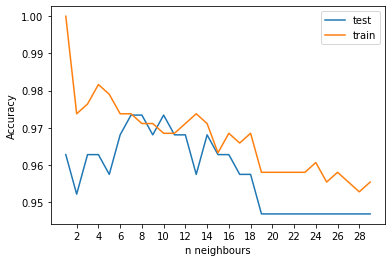

In [24]:
n_neighbors = range(1,30)

# KNeighborsClassifier is implementing the k-nearest neighbors vote
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33, random_state = 45)

# normalization of data for KNN
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

train_accuracies = []
test_accuracies=[]

for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))    

# We want to plot our results
line1, =plt.plot(n_neighbors, test_accuracies,label='test_accuracies')
line2, =plt.plot(n_neighbors, train_accuracies,label='train_accuracies')
plt.xlabel("n neighbours")
plt.ylabel("Accuracy")
plt.xticks(range(2,30,2))
plt.legend((line1, line2), ('test', 'train'))
plt.show()

### Logistic regression

As a starting point, we run the Logistic regression classifer with an L1 penalty as a hyper parameter. This is used of regularization of the co-efficients. L1 is useful as it can push feature coefficients to 0, creating a method for feature selection.

In [26]:
clf = linear_model.LogisticRegression(penalty='l1', random_state=45)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, bc.data, bc.target, cv=5)
print("Accuracy: {0:.2%} +/- {1:.2%}".format(scores.mean(), scores.std()))
print('The 1st instance is predicted to belong to class:', clf.predict(bc.data[:1, :]))
print('The probabilities of belonging to each one of the classes are estimated as:', clf.p

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_8308/720101674.py, line 6)

In [27]:
y_pred = clf.predict(X_test)
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Confusion Matrix: - 
 [[ 58  10]
 [  0 120]]

Classification Report: - 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        68
           1       0.92      1.00      0.96       120

    accuracy                           0.95       188
   macro avg       0.96      0.93      0.94       188
weighted avg       0.95      0.95      0.95       188



In [28]:
grid_values = {'penalty': ['l1', 'l2'], \
               'C':[1e-4,0.001,.009,0.01,.09,1,5,10,25,100,1000,1e4]}

clf = linear_model.LogisticRegression(random_state=45)

inner_cv = KFold(n_splits=4, shuffle=True, random_state=45)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=45)

grid_logit = GridSearchCV(clf, grid_values, cv = inner_cv, scoring='f1',n_jobs=-1)
grid_logit.fit(X_train,y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(grid_logit, bc.data, bc.target, cv=outer_cv)

C:\Users\ASUS\Documents\0.DATA_SCIENCE_CODING\.anaconda\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.76652493        nan 0.90231882        nan 0.96149696
        nan 0.96352777        nan 0.97495019        nan 0.98076337
        nan 0.98069936        nan 0.97836845        nan 0.978288
        nan 0.97200321        nan 0.97013801        nan 0.96803992]
  warnings.warn(
C:\Users\ASUS\Documents\0.DATA_SCIENCE_CODING\.anaconda\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.9394071         nan 0.94804006        nan 0.94463498
        nan 0.94653637        nan 0.95207011        nan 0.95337207
        nan 0.94937431        nan 0.95741445        nan 0.9518419
        nan 0.95527465        nan 0.9554744         nan 0.94939794]
  warnings.warn(
C:\Users\ASUS\Documents\0.DATA_SCIENCE_CODING\.anaconda\Anaconda\

In [29]:
print("Using Nested CV with grid search, we acheive accuracy: {0:.2%} +/- {1:.2%}".format(nested_score.mean(), nested_score.std()))
print()
print ("The best hyper-parameters to get these accuracy are :-\n", grid_logit.best_params_)
print()
print ("The best logistic regression classifier is :-\n", grid_logit.best_estimator_)
y_pred = grid_logit.best_estimator_.predict(X_test)
#plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,title='Confusion matrix')
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Using Nested CV with grid search, we acheive accuracy: 95.23% +/- 1.47%

The best hyper-parameters to get these accuracy are :-
 {'C': 1, 'penalty': 'l2'}

The best logistic regression classifier is :-
 LogisticRegression(C=1, random_state=45)
Confusion Matrix: - 
 [[ 65   3]
 [  0 120]]

Classification Report: - 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        68
           1       0.98      1.00      0.99       120

    accuracy                           0.98       188
   macro avg       0.99      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



### SVM

In [30]:
model = SVC(kernel = 'linear', random_state = 45)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.989501312335958
Testing Accuracy:  0.9574468085106383
Confusion Matrix: - 
 [[ 61   7]
 [  1 119]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        68
           1       0.94      0.99      0.97       120

    accuracy                           0.96       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.96      0.96      0.96       188



In [ ]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear','rbf']
param_grid = {'kernel':kernels,'C': Cs, 'gamma' : gammas}

model = SVC(probability=True,random_state = 45)

inner_cv = KFold(n_splits=4, shuffle=True, random_state=45)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=45)

grid_svm = GridSearchCV(model, param_grid, cv = inner_cv, scoring='f1',n_jobs=-1)
grid_svm.fit(X_train,y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(grid_svm, bc.data, bc.target, cv=outer_cv)

In [ ]:
print("Using Nested CV with grid search, we acheive accuracy: {0:.2%} +/- {1:.2%}".format(nested_score.mean(), nested_score.std()))
print()
print ("The best hyper-parameters to get these accuracy are :-\n", grid_svm.best_params_)
print()
print ("The best SVM classifier is :-\n", grid_svm.best_estimator_)
y_pred = grid_svm.best_estimator_.predict(X_test)
#plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,title='Confusion matrix')
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

#### Model Selection
Comparing all the models that have been analyzed so far:-

 Logistic Regression gives us the highest F1-Score of 98% with a high accuracy of 97.32% +/- 1.57%. Even though the standard deviation is higher in logistic regression, we choose this for classification due to the high F1-Score,

Based on the above analyses, we can conculde that among the 4 models discussed, Logistic regression gives us the best fit for classifying breast cancer cells and malignant or benign.